# Emissions calculations
### Points i go through
* Emissions vs adoption
* Factors affecting adoption
### What i will be doing here
* expanding the dataset by removing most categorical ranged values
* using this to incooperate AI which will help in predicting:
    - probability of population adopting
    - show how adoption affects emissions.
    - show how adoption affects monety generated by this population
### Hypothesis
* Carpooling has a significant impact on emissions reduction
### way forward proposal
* Carpooling is an unexplored sector in the war against global warming

In [29]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [30]:
df=pd.read_csv('../simulated_carpool_data.csv')
df.head()


,Unnamed: 0,id,age,gender,location,status,income,purpose,infrastructure_adequacy,trip_frequency,mode_transportation,reason,travel_distance,g_per_km,trip_cost,adoption
0,0,1,26-50,Male,Off campus,Staff,61k–80k,work,yes,3,Public Transport,safety,<=20,18.6,20,yes
1,1,2,26-50,Female,Off campus,Staff,41k–60k,work,yes,3,Private,comfort,21-40,116.0,330,yes
2,2,3,26-50,Female,Off campus,Staff,41k–60k,work,yes,Daily,Taxi,car ownership,41-60,116.0,3020,no
3,3,4,<=20,Male,Off campus,Students,21k–40k,study,yes,5,Public Transport,travel time,21-40,18.6,60,yes
4,4,5,<=20,Male,Off campus,Students,≤20k,both,no,3,Public Transport,travel time,41-60,18.6,100,no


In [31]:
print(df['travel_distance'].unique())
N=len(df)

['<=20' '21-40' '41-60' '80+' '61-80']


In [32]:
#expanding distance travelled column 
# from categorical to numerical
distance_mapping = {
    '<=20': np.random.randint(1, 20,size=N),
    '21-40': np.random.randint(21, 40,size=N),
    '41-60': np.random.randint(41, 60,size=N),
    '61-80': np.random.randint(61, 80,size=N),
    '80+': np.random.randint(81, 100,size=N),
   
}
df['travel_distance_exp'] = df['travel_distance'].map(lambda x: np.random.choice(distance_mapping[x]))
df['travel_distance_exp'].head()

0    17
1    31
2    49
3    28
4    45
Name: travel_distance_exp, dtype: int32

In [33]:
# expanding g_per_km column


emissions_mapping = {
    'Private': np.random.randint(90, 190,size=N),
    'Taxi': np.random.randint((100), (170),size=N),
    'Motorcycle': np.random.randint(60, 120,size=N),
    "Public Transport": np.random.randint((120/14), (250/14),size=N),
    'Walking': list(np.zeros(N)),
}
df['emissions_exp'] = df['mode_transportation'].map(lambda x: np.random.choice(emissions_mapping[x]), )
df['emissions_exp'].head()


0      8.0
1    186.0
2    141.0
3     14.0
4     15.0
Name: emissions_exp, dtype: float64

In [34]:
#expanding age column
print(df["age"].unique())
age_mapping = {
    '<=20': np.random.randint(18, 25,size=N),
    '26-50': np.random.randint(26, 50,size=N),
    '51+': np.random.randint(51, 70,size=N),
}
df["age_exp"]=df["age"].map(lambda x: np.random.choice(age_mapping[x]))
df["age_exp"].head()

['26-50' '<=20' '51+']


0    26
1    26
2    29
3    23
4    22
Name: age_exp, dtype: int32

In [35]:
#expanding income column
N=len(df)
print(df["income"].unique())
inc_mappings={
    '≤20k': np.random.randint(1, 20,size=N),
    '21k–40k': np.random.randint(21, 40,size=N),
    '41k–60k': np.random.randint(41, 60,size=N),
    '61k–80k': np.random.randint(61, 80,size=N),
    '81k-100k': np.random.randint(81, 100,size=N),
    '>100k': np.random.randint(101, 200,size=N),
    }
df["income_exp"]=df["income"].map(lambda x: np.random.choice(inc_mappings[x])
)
df["income_exp"].head()

['61k–80k' '41k–60k' '21k–40k' '≤20k' '81k-100k' '>100k']


0    75
1    58
2    57
3    38
4     4
Name: income_exp, dtype: int32

In [36]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'location', 'status', 'income',
       'purpose', 'infrastructure_adequacy', 'trip_frequency',
       'mode_transportation', 'reason', 'travel_distance', 'g_per_km',
       'trip_cost', 'adoption', 'travel_distance_exp', 'emissions_exp',
       'age_exp', 'income_exp'],
      dtype='object')

In [37]:
# encoding other columns
df_encoded = pd.get_dummies(df, columns=['gender','reason','status','location','mode_transportation','purpose','infrastructure_adequacy','adoption'], drop_first=True)
df_encoded['trip_frequency']=df_encoded['trip_frequency'].map({'Daily':7,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6})

df_encoded.head()

,Unnamed: 0,id,age,income,trip_frequency,travel_distance,g_per_km,trip_cost,travel_distance_exp,emissions_exp,...,status_Students,location_On campus,mode_transportation_Private,mode_transportation_Public Transport,mode_transportation_Taxi,mode_transportation_Walking,purpose_study,purpose_work,infrastructure_adequacy_yes,adoption_yes
0,0,1,26-50,61k–80k,3,<=20,18.6,20,17,8.0,...,False,False,False,True,False,False,False,True,True,True
1,1,2,26-50,41k–60k,3,21-40,116.0,330,31,186.0,...,False,False,True,False,False,False,False,True,True,True
2,2,3,26-50,41k–60k,7,41-60,116.0,3020,49,141.0,...,False,False,False,False,True,False,False,True,True,False
3,3,4,<=20,21k–40k,5,21-40,18.6,60,28,14.0,...,True,False,False,True,False,False,True,False,True,True
4,4,5,<=20,≤20k,3,41-60,18.6,100,45,15.0,...,True,False,False,True,False,False,False,False,False,False


In [38]:
df_encoded.columns

Index(['Unnamed: 0', 'id', 'age', 'income', 'trip_frequency',
       'travel_distance', 'g_per_km', 'trip_cost', 'travel_distance_exp',
       'emissions_exp', 'age_exp', 'income_exp', 'gender_Male',
       'reason_comfort', 'reason_safety', 'reason_travel time',
       'reason_trip cost', 'reason_trip distance', 'reason_trip origin',
       'status_Students', 'location_On campus', 'mode_transportation_Private',
       'mode_transportation_Public Transport', 'mode_transportation_Taxi',
       'mode_transportation_Walking', 'purpose_study', 'purpose_work',
       'infrastructure_adequacy_yes', 'adoption_yes'],
      dtype='object')

In [39]:
df_encoded["location_On campus"].value_counts().unique()

array([1607,  393])

In [40]:
#using original 20% randomly picked adopters
def adjust_emissions(row):
    if row['adoption_yes'] == True:
        # pick random taxi emission then divide by 3
        random_taxi_emission = np.random.randint(100, 171)
        return random_taxi_emission / 3
    else:
        # keep original emission
        return row['emissions_exp']
df_encoded['adjusted_emissions'] = df_encoded.apply(adjust_emissions, axis=1)
df_encoded.to_csv("../dataset_encoded.csv",index=False)
df_encoded.head()

,Unnamed: 0,id,age,income,trip_frequency,travel_distance,g_per_km,trip_cost,travel_distance_exp,emissions_exp,...,location_On campus,mode_transportation_Private,mode_transportation_Public Transport,mode_transportation_Taxi,mode_transportation_Walking,purpose_study,purpose_work,infrastructure_adequacy_yes,adoption_yes,adjusted_emissions
0,0,1,26-50,61k–80k,3,<=20,18.6,20,17,8.0,...,False,False,True,False,False,False,True,True,True,39.000000
1,1,2,26-50,41k–60k,3,21-40,116.0,330,31,186.0,...,False,True,False,False,False,False,True,True,True,43.333333
2,2,3,26-50,41k–60k,7,41-60,116.0,3020,49,141.0,...,False,False,False,True,False,False,True,True,False,141.000000
3,3,4,<=20,21k–40k,5,21-40,18.6,60,28,14.0,...,False,False,True,False,False,True,False,True,True,38.333333
4,4,5,<=20,≤20k,3,41-60,18.6,100,45,15.0,...,False,False,True,False,False,False,False,False,False,15.000000


In [41]:
y=df_encoded['adjusted_emissions']
X=df_encoded.drop(columns=['Unnamed: 0','emissions_exp','id','age','income','travel_distance','adjusted_emissions','trip_cost','g_per_km',])
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=df_encoded["adoption_yes"],
    random_state=42
)



In [42]:
lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred=lrmodel.predict(X_test)
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 1044.2847461551012
RMSE: 32.31539487852657
MAE: 27.373440768242432
R² Score: 0.7088191356685016


In [44]:

reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(random_state=42)
reg3 = RandomForestRegressor(random_state=42)
reg4 = SVR()

voting_reg = VotingRegressor(
    estimators=[
        ('lr', reg1),
        ('dt', reg2),
        ('rf', reg3),
        ('svr', reg4)
    ]
)

voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 712.4559157124824
RMSE: 26.69186984294061
MAE: 20.458810172801194
R² Score: 0.8013439053868571


In [45]:
def plot_linear_feature_importance(model, feature_names, top_n=15, figsize=(10, 8)):
    """
    Plot feature importance for Linear Regression as bar chart
    """
    if not hasattr(model, 'coef_'):
        raise ValueError("Model must be a fitted linear model")
    
    # Get coefficients
    coefficients = model.coef_
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(coefficients),
        'coefficient': coefficients
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    colors = ['red' if coef < 0 else 'blue' for coef in importance_df['coefficient']]
    
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color=colors, alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Absolute Coefficient Value')
    
    model_type = type(model).__name__
    plt.title(f'{model_type} Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (importance, coef) in enumerate(zip(importance_df['importance'], importance_df['coefficient'])):
        plt.text(importance + 0.01, i, f'{coef:.3f}', va='center', fontsize=10)
    
    # Add legend
    plt.legend(handles=[
        plt.Rectangle((0,0),1,1, color='blue', alpha=0.7, label='Positive Impact'),
        plt.Rectangle((0,0),1,1, color='red', alpha=0.7, label='Negative Impact')
    ])
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

In [46]:
def plot_voting_regressor_feature_importance(voting_reg, feature_names, top_n=15, figsize=(12, 8)):
    """
    Plot feature importance for Voting Regressor as bar chart
    """
    if not hasattr(voting_reg, 'named_estimators_'):
        raise ValueError("Model must be a fitted VotingRegressor")
    
    importances = []
    model_names = []
    
    # Collect importances from all models in the ensemble
    for name, model in voting_reg.named_estimators_.items():
        if hasattr(model, 'feature_importances_'):
            importances.append(model.feature_importances_)
            model_names.append(name)
        elif hasattr(model, 'coef_'):
            coef_importance = np.abs(model.coef_)
            importances.append(coef_importance)
            model_names.append(name)
    
    if not importances:
        raise ValueError("No models with feature importance available")
    
    # Calculate average importance
    avg_importance = np.mean(importances, axis=0)
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': avg_importance
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color='orange', alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Average Importance Score')
    plt.title(f'Voting Regressor Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, importance in enumerate(importance_df['importance']):
        plt.text(importance + 0.001, i, f'{importance:.3f}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

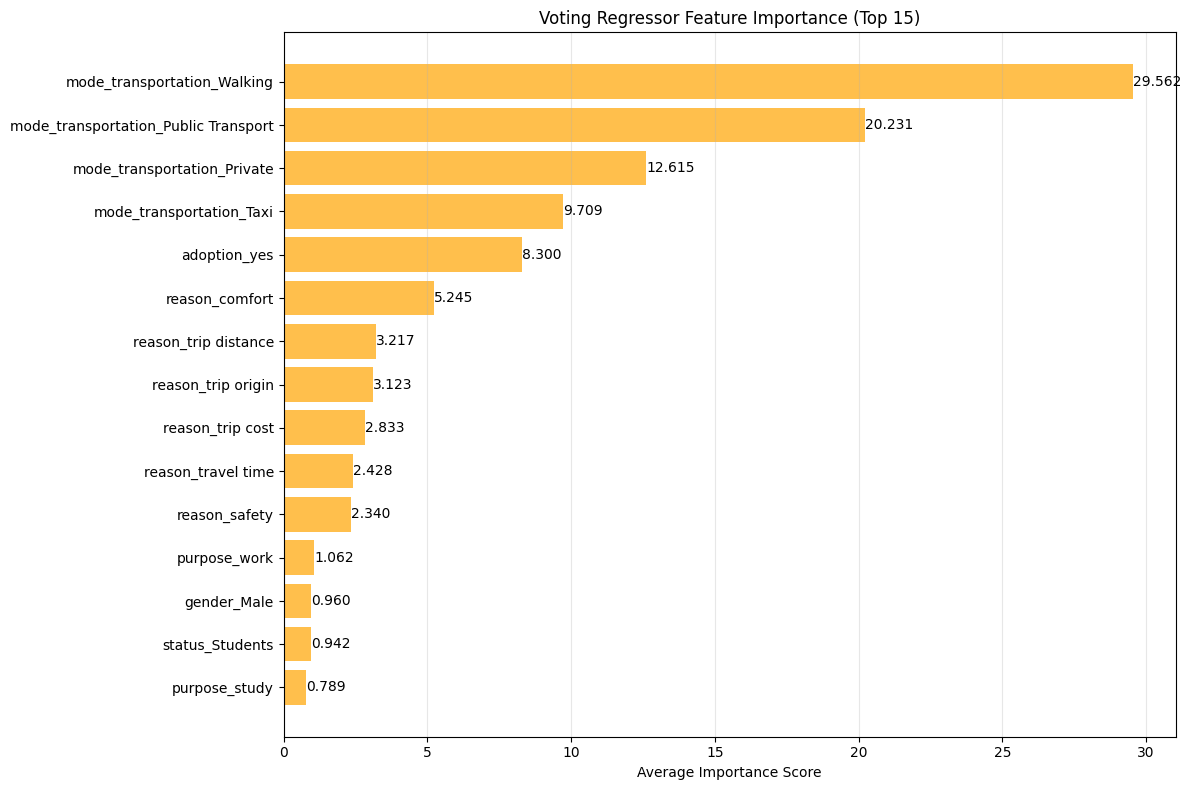

In [47]:
feature_names=X.columns
votingplot=plot_voting_regressor_feature_importance(voting_reg,feature_names)

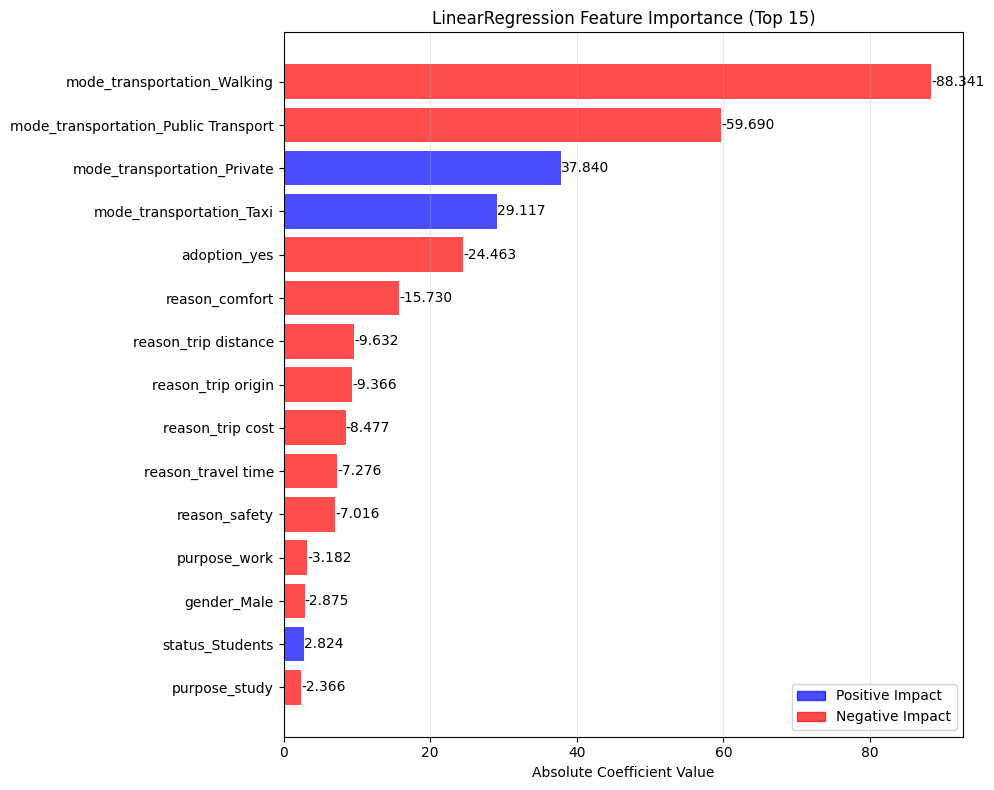

In [48]:
feature_names=X.columns
regressionplot=plot_linear_feature_importance(lrmodel, feature_names)

In [49]:
# statistical test to see if there is a significant difference in emissions between adopters and non-adopters
# Ho : There is no significant difference in emissions between adopters and non-adopters
# Ha : There is a significant difference in emissions between adopters and non-adopters
from scipy.stats import ttest_ind
df=df_encoded.copy()
group1 = df[df['adoption_yes'] == True]['adjusted_emissions']
group2 = df[df['adoption_yes'] == False]['adjusted_emissions']

t, p = ttest_ind(group1, group2)
print(t, p)


-10.367985303674455 1.4375663401844986e-24


A P-value of 1.47e^-29 is less than 0.05 so we reject the null hypothesis proving Adoption has a significant impact of emissions